
<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 15px; height: 80px">

# Random Forests


_Author and Instructor: Dr. Junaid Qazi, PhD_

---

Additional Readings:<br>
* [Elements of Statistical Learning - Ch#15 on Random Forests (Page-587)](https://web.stanford.edu/~hastie/ElemStatLearn/)<br>
* [ISLR (8.2 Page 316) on Bagging, Random Forests, Boosting -- Please Read (8.2.2 Page 319 on Random Forests)](http://faculty.marshall.usc.edu/gareth-james/)<br>
* **[Decision Tree and Random Forests - A complete project](https://drive.google.com/open?id=1ZxEynIaCdffcDkQ-UKJaHMCn8THWB8ql)**

## Import libraries
---

We'll need the following libraries for today's lecture:
- `pandas`
- `numpy`
- `GridSearchCV`, `train_test_split` and `cross_val_score` from `sklearn`'s `model_selection` module 
- `RandomForestClassifier` from `sklearn`'s `ensemble` module 

```Python
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.ensemble import RandomForestClassifier#, ExtraTreesClassifier
from sklearn.model_selection import cross_val_score, train_test_split, GridSearchCV

# To ignore unwanted warnings
import warnings
warnings.filterwarnings('ignore')
```

In [46]:
# Code here please
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.ensemble import RandomForestClassifier 
from sklearn.model_selection import cross_val_score, train_test_split, GridSearchCV

## Load Data
---

Load `train.csv`  from Kaggle into `DataFrames`.

```Python
titanic = pd.read_csv('./datasets/train.csv')
```

In [43]:
# Code here please
titanic = pd.read_csv('datasets/train.csv')
titanic

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


## How many entries are missing in train and test datasets?

```Python
titanic.isnull().sum()# head(), info() -- you know how to use them!
```

In [44]:
# CODE HERE PLEASE
titanic.isnull().sum()


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

* In train: `Age`, `Cabin` and `Embarked`

**Create these heatmaps, yellow are the missing data**. `Hint: cmap='viridis'`

```Python
fig, ax = plt.subplots(nrows = 1, ncols = 1, figsize = (16, 6))

# train data 
sns.heatmap(titanic.isnull(), yticklabels=False, ax = ax, cbar=False, cmap='viridis')
ax.set_title('Train data')
```

Text(0.5, 1.0, 'Train Data')

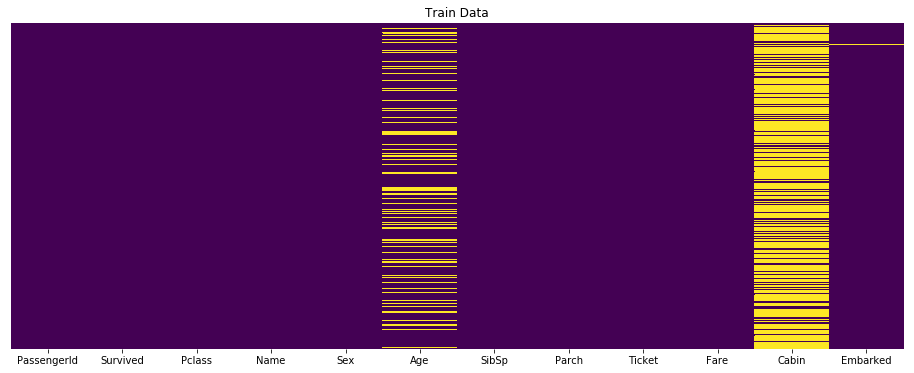

In [49]:
# CODE HERE PLEASE
fig, ax = plt.subplots(nrows = 1, ncols = 1, figsize = (16, 6))
sns.heatmap(titanic.isnull(), yticklabels= False, ax = ax, cbar= False, cmap = 'viridis')
ax.set_title('Train Data')

## Data Cleaning: 

**How many ports are in Embarked column?(train data)**

```Python
titanic.Embarked.value_counts()
```

In [50]:
# CODE HERE PLEASE
titanic.Embarked.value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

**Well, we can drop the two rows with missing `Embarked` values in train, however, let's fill them with the port of highest embarkation.**

```Python
titanic.Embarked.fillna('S', inplace=True)
```

In [51]:
# CODE HERE PLEASE
titanic.Embarked.fillna('S', inplace = True)

**What is the shape of your dataset.** 

```Python
titanic.Embarked.value_counts()
```

```Python
titanic.shape
```

In [52]:
# CODE HERE PLEASE
titanic.shape

(891, 12)

**Compute the average of `Fare` of the missing `Pclass` (you should be able to identify this from above question).**

```Python
mean_fare_3 = titanic[titanic['Pclass'] == 3]['Fare'].mean()
print('The mean fare for the Pclass (for missing fare data) is: ', mean_fare_3)
```

In [61]:
# CODE HERE PLEASE
mean_fare_3 = titanic[titanic['Pclass'] == 3]['Fare'].mean()
print("The mean fare for the Pclass (for missing fare data is : ", mean_fare_3)

The mean fare for the Pclass (for missing fare data is :  13.675550101832997


### Let's see how to teat the `Age` column!

**What is the mean age of each Pclass in the titanic data.**

```Python
titanic[['Pclass','Age']].groupby('Pclass').mean() #describe() # try describe with groupby!
```

In [60]:
# CODE HERE PLEASE
titanic [['Pclass', 'Age']].groupby('Pclass').mean()

,Age
Pclass,
1,36.395463
2,29.586033
3,25.101670


**Write a function `impute_age` to fill the mean age with respect to each `Pclass`.**<br>
*I left this code for you guys, please try to understand.*

```Python
#defining a function 'impute_age'
def impute_age(age_pclass): # passing age_pclass as ['Age', 'Pclass']
    
    # Passing age_pclass[0] which is 'Age' to variable 'Age'
    Age = age_pclass[0]
    
    # Passing age_pclass[2] which is 'Pclass' to variable 'Pclass'
    Pclass = age_pclass[1]
    
    #applying condition based on the Age and filling the missing data respectively 
    if pd.isnull(Age):

        if Pclass == 1:
            return 38

        elif Pclass == 2:
            return 30

        else:
            return 25

    else:
        return Age
    ```

In [57]:
# CODE HERE PLEASE

def impute_age (age_pclass):
    Age = age_pclass[0]
    
    Pclass = age_pclass[0]
    
    if pd.isnull(Age):
        if Pclass == 1:
            return 38
        
        elif Pclass == 2:
            return 30
        else:
            return 25
    else: 
        return Age
    

**Use the above function to both of your datasets and fill the missing data in `Age` column accordingly.**

```Python
# grab age and apply the impute_age, our custom function 
titanic['Age'] = titanic[['Age','Pclass']].apply(impute_age,axis=1)
```

In [59]:
# CODE HERE PLEASE
titanic['Age'] = titanic[['Age','Pclass']].apply(impute_age, axis=1)
titanic

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,25.0,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


```Python
titanic.isnull().sum()
```

In [62]:
# CODE HERE PLEASE
titanic.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64

### Looks good now! The only column is `Cabin`. Let's do some Feature Engineering here 
There are quite a lot of missing data in `Cabin`. Let's this column.

Do this thing:
- If there originally was a value for `Cabin` -- put 1
- If the value is missing/null -- put 0


HINT: `.astype()`

```Python
titanic['Cabin'] = titanic['Cabin'].notnull().astype(int)
```

In [65]:
# CODE HERE PLEASE
titanic['Cabin'] = titanic['Cabin'].notnull().astype(int)
titanic.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

```Python
fig, ax = plt.subplots(nrows = 1, ncols = 1, figsize = (16, 6))
# train data 
sns.heatmap(titanic.isnull(), yticklabels=False, ax = ax, cbar=False, cmap='viridis')
ax.set_title('Train data')
```

Text(0.5, 1.0, 'Train data')

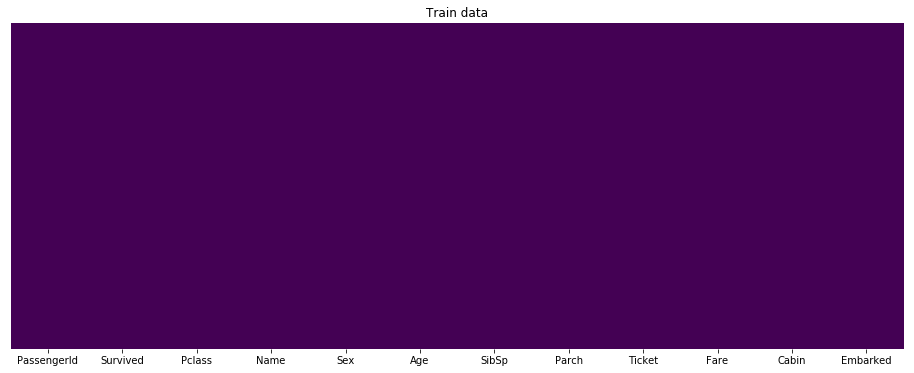

In [67]:
# CODE HERE PLEASE

fig, ax = plt.subplots(nrows = 1, ncols = 1 , figsize = (16, 6))

# train data
sns.heatmap(titanic.isnull(), yticklabels = False, ax = ax, cbar =False, cmap = 'viridis')
ax.set_title("Train data")

### Excellent, looks all good. No more missing data!

### Dummies
**Dummy the `Sex` and `Embarked` columns. Be sure to set `drop_first=True`.**

```Python
titanic = pd.get_dummies(titanic, columns=['Sex', 'Embarked'], drop_first=True)
```

In [15]:
# CODE HERE PLEASE

***Here, we are done with dummies, you can either use head, info to confirm the new columns, however, I am using heatmap again. Compare the difference between above and below heatmaps, do you see new columns after dummies?***

```Python
fig, ax = plt.subplots(nrows = 1, ncols = 1, figsize = (18, 6))
# train data 
sns.heatmap(titanic.isnull(), yticklabels=False, ax = ax, cbar=False, cmap='viridis')
ax.set_title('Train data')
```

In [16]:
# CODE HERE PLEASE

## Model Prep: Create `X` and `y` variables
---

Our features will be:`[Pclass, Age, SibSp, Parch, Fare, Cabin, Sex_male, Embarked_Q, Embarked_S]`

And our target will be `Survived`

```Python
features_drop = ['PassengerId','Name', 'Ticket', 'Survived']
```

In [17]:
# CODE HERE PLEASE

**Write a list comprehension to grab the selected features, I know you can simply pass the list of feature but you must write list comprehension here.**

```Python
# list Comprehension
selected_features = [x for x in titanic.columns if x not in features_drop]
selected_features
```

In [18]:
# CODE HERE PLEASE

**Now, separate the selected_column in `X_train` and `Survived` in `y_train`.**

```Python
X = titanic[selected_features]
y = titanic['Survived']
```

In [19]:
# CODE HERE PLEASE

```Python
from sklearn.model_selection import train_test_split
```

In [20]:
# CODE HERE PLEASE

```Python
# shift+tab and simply copy
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.30, random_state=101)
```

In [21]:
# CODE HERE PLEASE

**What is our baseline accuracy?**<br>
The baseline accuracy is the percentage of the majority class, regardless of whether it is 1 or 0. It serves as the benchmark for our model to beat.

```Python
y_train.value_counts(normalize=True)
```

In [22]:
# CODE HERE PLEASE

```Python
# RF instance with 100 trees -- <see the documentation>
rf = RandomForestClassifier(n_estimators=100) # bootstrap=True by default #max_features='auto',
```

In [23]:
# CODE HERE PLEASE

**Fit the instance on train data.**

```Python
rf = rf.fit(X_train, y_train)
```

In [24]:
# CODE HERE PLEASE

**Let's evaluate the model on test data**<br>

**Get the predictions for both models in pred_rd and pred_et for test data now.** 

```Python
from sklearn.metrics import classification_report, confusion_matrix
```

In [25]:
# CODE HERE PLEASE

```Python
pred_rf = rf.predict(X_test)
```

**Print confusion matrix and classification reports for both models.** 

```Python
print('confusion matrix for RF')
print(confusion_matrix(y_test, pred_rf))

print('classification report for RF')
print(classification_report(y_test, pred_rf))
```

In [26]:
# CODE HERE PLEASE

# Bonus Part Below...!

Random Forests is a robust and state of the art Machine Learning algorithm. We may not need to do the GridSearch for them however, along with no. of features in each bootstrapped sample, the depth of the tree could be an important parameter. They may needs to be optimized to avoid possible overfitting. <br>  
Let's try GridSearch on only on the `max_depth`, you can try other set os parameters as well and see how the things work.

## Grid Search for Random Forest
---

They're both pretty close performance-wise. **We could Grid Search over both**, but for the sake of time we'll go with `RandomForestClassifier`. <br>Try for the 2nd one yourself!

```Python
# our grid
rf_params = {
#    'n_estimators': [10, 50, 100, 150, 200, 250],
#    'max_features':[2, 3, 5, 7, 8],
    'max_depth': [1, 2, 3, 4, 5, 8],
#    'criterion':['gini', 'entropy'],
}
```

In [39]:

# CODE HERE PLEASE


```Python
rf_g = RandomForestClassifier(n_estimators=100) # just a new instance!
```

In [28]:
# CODE HERE PLEASE

**Run the GridSearch with CV = 5.**

```Python
gs = GridSearchCV(rf_g, param_grid=rf_params, cv=5, verbose = 1)#, refit=False) 
#shift+tab should be your punch pad now, right?
```

In [29]:
# CODE HERE PLEASE

```Python
gs.fit(X_train, y_train)
```

In [30]:
# CODE HERE PLEASE

**What is the best score now on train data set?**

```Python
print(gs.best_score_)
```

In [31]:
# CODE HERE PLEASE

**What is the score of your trained model after GridSearch on test data.**

```Python
gs.score(X_test, y_test)
```

In [32]:
# CODE HERE PLEASE

**How to get the best parameters.**

```Python
gs.best_params_
```

In [33]:
# CODE HERE PLEASE

**What is your best model after gridsearch?**

```Python
rf_best=gs.best_estimator_
rf_best
```

In [34]:
# CODE HERE PLEASE

**Fit train data using best model.**

```Python
rf_best = rf_best.fit(X_train, y_train)
```

In [35]:
# CODE HERE PLEASE

**Get prediction for the best model in pred_rf_best.**

```Python
pred_rf_best = rf_best.predict(X_test)
```

In [36]:
# CODE HERE PLEASE

**Print confusion matrix and classification report.**

```Python
print('confusion matrix for RF')
print(confusion_matrix(y_test, pred_rf_best))

print('classification report for RF')
print(classification_report(y_test, pred_rf_best))
```

In [37]:
# CODE HERE PLEASE

### What do you notice with GridSearch? is this helpful?